In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import utils
import sklearn
import matplotlib.pyplot as plt

In [2]:
features = np.array([[10],[20],[30],[40],[50],[60],[70],[80]])
labels = np.array([7,5,7,1,2,1,5,4])

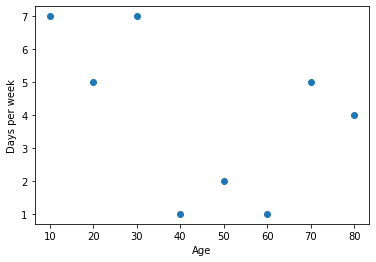

In [3]:
plt.scatter(features, labels)
plt.xlabel("Age")
plt.ylabel("Days per week")
plt.show()

# Fitting a decision tree

In [4]:
decision_tree_regressor = DecisionTreeRegressor(max_depth=2)
decision_tree_regressor.fit(features, labels)

DecisionTreeRegressor(max_depth=2)

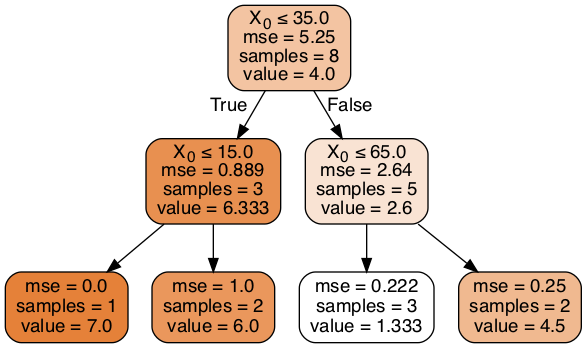

In [5]:
utils.display_tree(decision_tree_regressor)

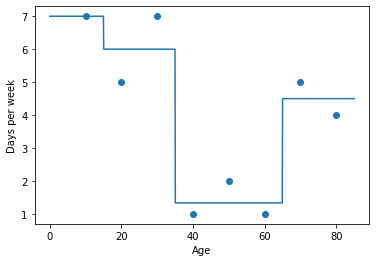

In [6]:
utils.plot_regressor(decision_tree_regressor, features, labels)

# Gradient boosting

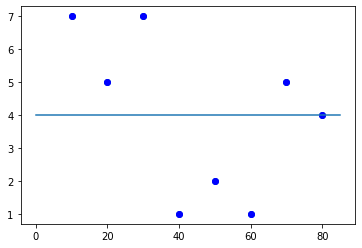

In [7]:
# First weak learner
x = np.linspace(0,85,2)
plt.scatter(features, labels)
plt.plot(x, [4 for i in range(len(x))])
plt.scatter(features, labels, color='blue')

In [8]:
gradient_boosting_regressor = GradientBoostingRegressor(max_depth=2, n_estimators=4, learning_rate=0.8)
gradient_boosting_regressor.fit(features, labels)
gradient_boosting_regressor.predict(features)

array([6.87466667, 5.11466667, 6.71466667, 1.43466667, 1.43466667,
       1.43466667, 4.896     , 4.096     ])

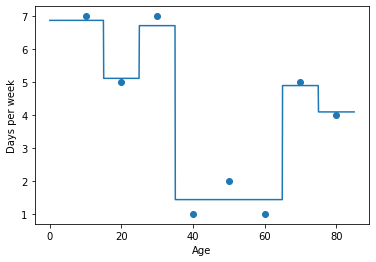

In [9]:
utils.plot_regressor(gradient_boosting_regressor, features, labels)


**************************************************

Weak learner 1
Residuals to predict: [ 3.  1.  3. -3. -2. -3.  1.  0.]
Predictions: [ 3.          2.          2.         -2.66666667 -2.66666667 -2.66666667
  0.5         0.5       ]


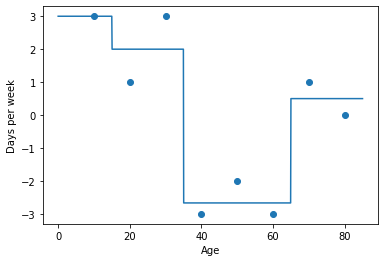

New residuals: [ 0.6        -0.6         1.4        -0.86666667  0.13333333 -0.86666667
  0.6        -0.4       ]

**************************************************

Weak learner 2
Residuals to predict: [ 0.6        -0.6         1.4        -0.86666667  0.13333333 -0.86666667
  0.6        -0.4       ]
Predictions: [ 0.          0.          1.4        -0.53333333 -0.53333333 -0.53333333
  0.1         0.1       ]


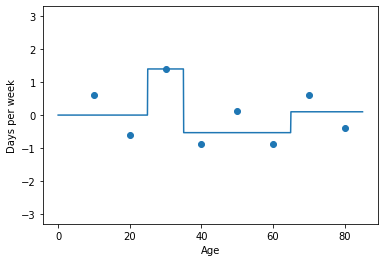

New residuals: [ 0.6  -0.6   0.28 -0.44  0.56 -0.44  0.52 -0.48]

**************************************************

Weak learner 3
Residuals to predict: [ 0.6  -0.6   0.28 -0.44  0.56 -0.44  0.52 -0.48]
Predictions: [ 6.00000000e-01 -6.00000000e-01 -7.40148683e-17 -7.40148683e-17
 -7.40148683e-17 -7.40148683e-17 -7.40148683e-17 -7.40148683e-17]


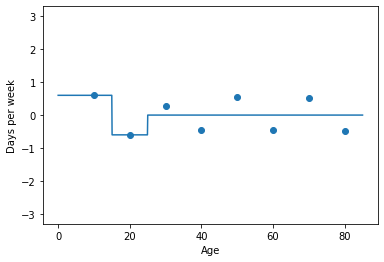

New residuals: [ 0.12 -0.12  0.28 -0.44  0.56 -0.44  0.52 -0.48]

**************************************************

Weak learner 4
Residuals to predict: [ 0.12 -0.12  0.28 -0.44  0.56 -0.44  0.52 -0.48]
Predictions: [-0.00666667 -0.00666667 -0.00666667 -0.00666667 -0.00666667 -0.00666667
  0.52       -0.48      ]


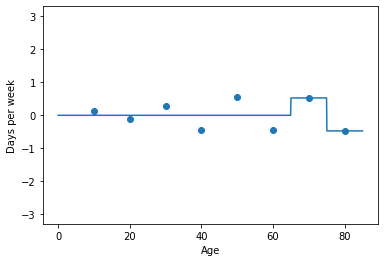

New residuals: [ 0.12533333 -0.11466667  0.28533333 -0.43466667  0.56533333 -0.43466667
  0.104      -0.096     ]


In [10]:
predictions_estimators = []
predictions = np.zeros(8)
centered_labels = labels-labels.mean()
residuals = [centered_labels]
for i in range(len(gradient_boosting_regressor.estimators_)):
    weak_learner = gradient_boosting_regressor.estimators_[i][0]
    print("\n"+"*"*50+"\n")
    print("Weak learner", i+1)
    preds = weak_learner.predict(features)
    predictions_estimators.append(preds)
    print("Residuals to predict:", residuals[-1])
    print("Predictions:", preds)
    predictions += preds*0.8
    #plt.scatter(features, predictions)
    #plt.scatter(features, residuals[-1])
    #plot_regressor(tree[0], features, centered_labels)
    plt.scatter(features, centered_labels, color='white')
    utils.plot_regressor(weak_learner, features, residuals[-1])
    plt.show()
    residuals.append(centered_labels-predictions)
    print("New residuals:", residuals[-1])

Predictions of the first i learners

Up to weak learner number 1


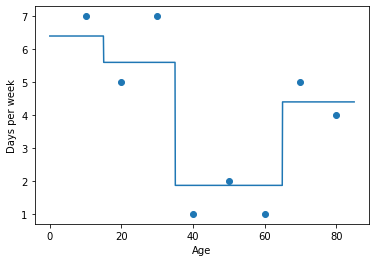

Up to weak learner number 2


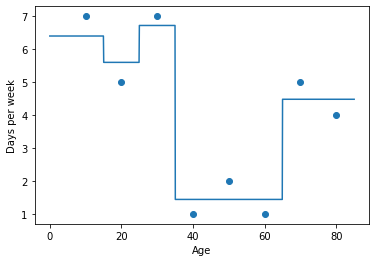

Up to weak learner number 3


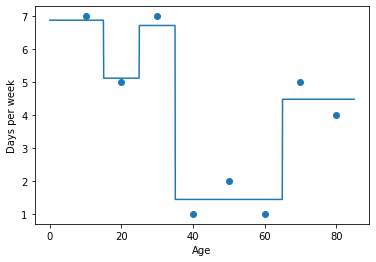

Up to weak learner number 4


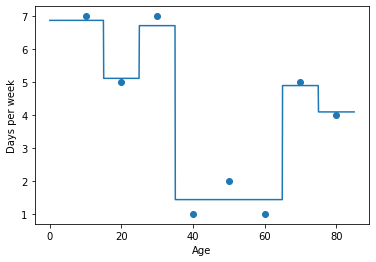

In [11]:
for i in range(1,5):
    print("Up to weak learner number", i)
    gb_intermediate = GradientBoostingRegressor(max_depth=2, n_estimators=i, learning_rate=0.8)
    gb_intermediate.fit(features, labels)
    predictions = gb_intermediate.predict(features)
    utils.plot_regressor(gb_intermediate, features, labels)

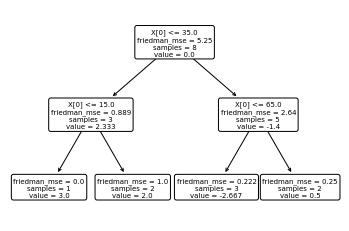

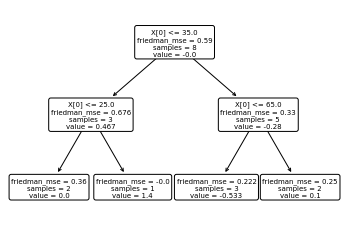

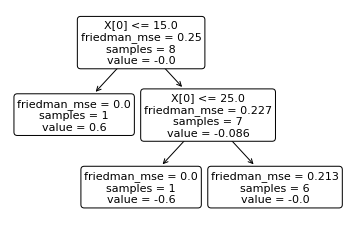

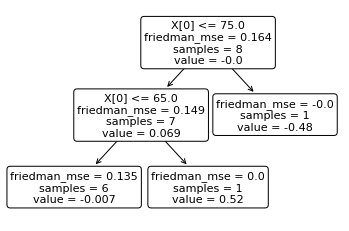

In [12]:
for tree in gradient_boosting_regressor.estimators_:
    sklearn.tree.plot_tree(tree[0], rounded=True)
    plt.show()

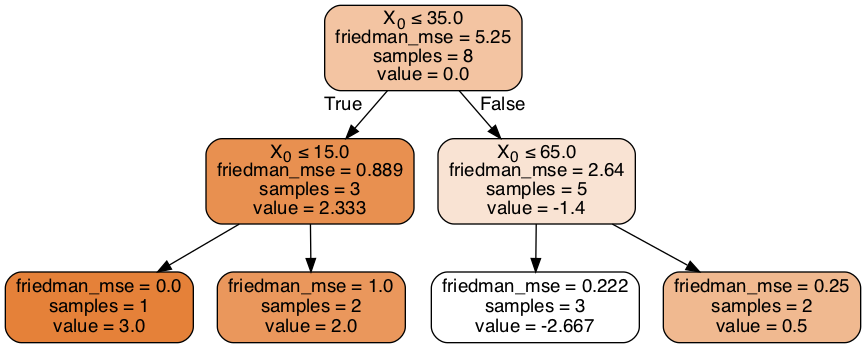

In [13]:
utils.display_tree(gradient_boosting_regressor.estimators_[0][0])

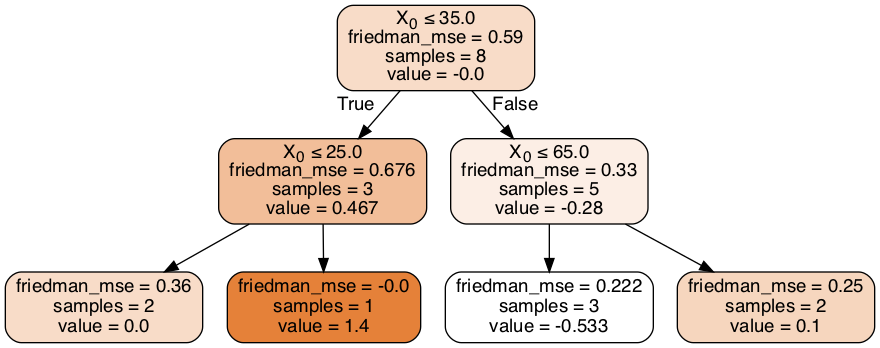

In [14]:
utils.display_tree(gradient_boosting_regressor.estimators_[1][0])

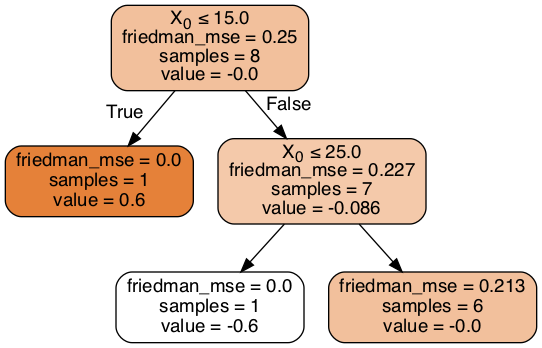

In [15]:
utils.display_tree(gradient_boosting_regressor.estimators_[2][0])

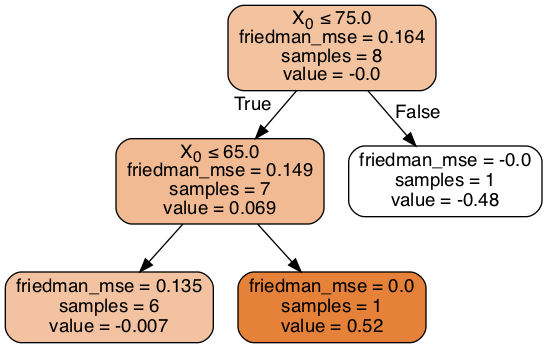

In [16]:
utils.display_tree(gradient_boosting_regressor.estimators_[3][0])

# XGBoost

In [17]:
import xgboost
from xgboost import XGBRegressor
xgboost_regressor = XGBRegressor(random_state=0,
                             n_estimators=3,
                             max_depth=2,
                             reg_lambda=0,
                             min_split_loss=1,
                             learning_rate=0.7)
xgboost_regressor.fit(features, labels)
xgboost_regressor.score(features, labels)

0.9438806326863372

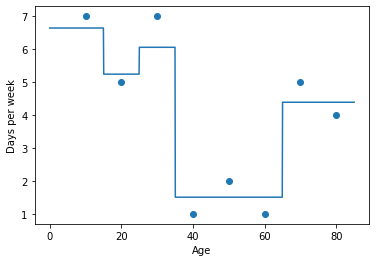

In [18]:
utils.plot_regressor(xgboost_regressor, features, labels)

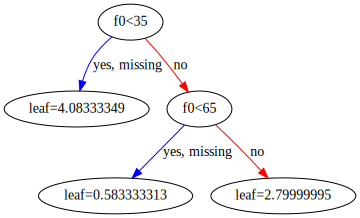

In [19]:
xgboost.to_graphviz(xgboost_regressor, num_trees=0)

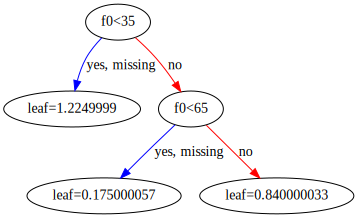

In [20]:
xgboost.to_graphviz(xgboost_regressor, num_trees=1)

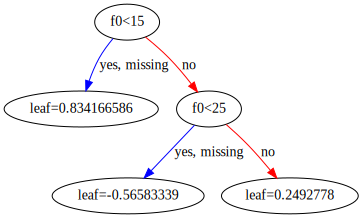

In [21]:
xgboost.to_graphviz(xgboost_regressor, num_trees=2)

In [22]:
xgboost_regressor.predict(features)

array([6.6425   , 5.2425   , 6.057611 , 1.5076112, 1.5076112, 1.5076112,
       4.3892775, 4.3892775], dtype=float32)

# Calculations of similarity score

In [23]:
residuals = labels-0.5
residuals

array([6.5, 4.5, 6.5, 0.5, 1.5, 0.5, 4.5, 3.5])

In [24]:
def score(l, lam=0):
    if len(l)==0:
        return 0
    return sum(l)**2/(len(l)+lam)

In [25]:
score(residuals, lam=0)

98.0

In [26]:
lam = 0
for i in range(len(residuals)):
    left = residuals[:i]
    right = residuals[i:]
    print(left, right)
    print(score(left), score(right))
    print(score(left, lam)+score(right, lam))
    print()

[] [6.5 4.5 6.5 0.5 1.5 0.5 4.5 3.5]
0 98.0
98.0

[6.5] [4.5 6.5 0.5 1.5 0.5 4.5 3.5]
42.25 66.03571428571429
108.28571428571429

[6.5 4.5] [6.5 0.5 1.5 0.5 4.5 3.5]
60.5 48.166666666666664
108.66666666666666

[6.5 4.5 6.5] [0.5 1.5 0.5 4.5 3.5]
102.08333333333333 22.05
124.13333333333333

[6.5 4.5 6.5 0.5] [1.5 0.5 4.5 3.5]
81.0 25.0
106.0

[6.5 4.5 6.5 0.5 1.5] [0.5 4.5 3.5]
76.05 24.083333333333332
100.13333333333333

[6.5 4.5 6.5 0.5 1.5 0.5] [4.5 3.5]
66.66666666666667 32.0
98.66666666666667

[6.5 4.5 6.5 0.5 1.5 0.5 4.5] [3.5]
85.75 12.25
98.0



In [27]:
left_tree = [6.5, 4.5, 6.5]
right_tree = [0.5, 1.5, 0.5, 4.5, 3.5]

In [28]:
residuals = left_tree
print(score(residuals))
for i in range(len(residuals)):
    left = residuals[:i]
    right = residuals[i:]
    print(left, right)
    print(score(left), score(right))
    print(score(left, lam)+score(right, lam))
    print()

102.08333333333333
[] [6.5, 4.5, 6.5]
0 102.08333333333333
102.08333333333333

[6.5] [4.5, 6.5]
42.25 60.5
102.75

[6.5, 4.5] [6.5]
60.5 42.25
102.75



In [29]:
residuals = right_tree
print(residuals)
for i in range(len(residuals)):
    left = residuals[:i]
    right = residuals[i:]
    print(left, right)
    print(score(left), score(right))
    print(score(left, lam)+score(right, lam))
    print()

[0.5, 1.5, 0.5, 4.5, 3.5]
[] [0.5, 1.5, 0.5, 4.5, 3.5]
0 22.05
22.05

[0.5] [1.5, 0.5, 4.5, 3.5]
0.25 25.0
25.25

[0.5, 1.5] [0.5, 4.5, 3.5]
2.0 24.083333333333332
26.083333333333332

[0.5, 1.5, 0.5] [4.5, 3.5]
2.0833333333333335 32.0
34.083333333333336

[0.5, 1.5, 0.5, 4.5] [3.5]
12.25 12.25
24.5

